<a href="https://colab.research.google.com/github/mcurry572/4540/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Answer the following questions: (i) When would you use MAE over MSE as a loss function for a regression problem? and (ii) What is the difference between Negative Log-Likelihood loss (NLL) and Cross Entropy loss (CE)?

*   You would want to use MAE over MSE when you are wanting to not penalize outliers as much. Also when you are looking for the median of the distribution as MSE is better at finding the mean. (ii) What is the difference between Negative Log-Likelihood loss (NLL) and Cross Entropy loss (CE)?
*   Negative log-likihood expects inputs to be of log probabilities and allows you to manually use Logsoftmax. CE combines NLL and Logsoftmax into one step. So CE is an easier implementation and NLL should be used when you are needing more control over each step or when you are working with a model that outputs log probabilities.



## Maximum Likelihood Estimation

This notebook assumes the data is a standard continuous normal distribution. The number of random samples, mean, and standard deviation of the distribution can be set in lines 7-9 in code cell 1.

The function `gaussian` calculates the negative log likelihood given the random samples and the initial predicted mean and standard deviations defined in initParams.

The key to the whole program is the scipy function `minimize`. It is a regular optimization function and more information about it can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

**Note:** the method can be a lot of different options, all different mathematical optimization techniques.


#### Questions:
1. If everything is working, we would expect more accurate $\mu^*$ and $\sigma^*$ predictions with more random samples. Think about why this is.
2. What happens when the initial parameter guesses are extremely off? What about when they're extremely close? How does this impact the number of samples?
3. Break down each line in the `gaussian` function. Knowing what you know about MLE, what do you think the function `stats.norm.logpdf` does?

In [ ]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize
np.random.seed(1)


samples = 100
mu      = 0
sigma   = 3


#  Take random sample from the distribution of data (normal dist in this case)
sample_data = np.random.normal(loc=mu, scale=sigma, size=samples)

def gaussian(params):
    mean = params[0]
    sd = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.norm.logpdf(sample_data, loc=mean, scale=sd))

    return nll


initParams = [1, 1]

results = minimize(gaussian, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} std*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} std   = {:.3f}'.format(mu, sigma))

mean*  = 0.182 std*  = 2.655
mean   = 0.000 std   = 3.000


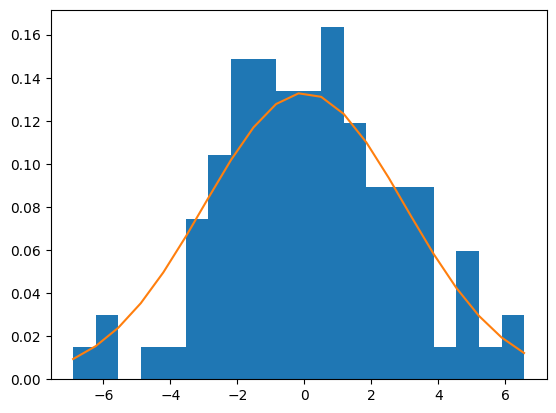

In [ ]:
import matplotlib.pyplot as plt

def normal_dist(inp, mean, std):
    return 1./(np.sqrt(2.*np.pi)*std)*np.exp(-np.power((inp - mean)/std, 2.)/2)

x = np.arange(-10, 10, 0.1)
y = normal_dist(x, mu, sigma)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))
plt.show()

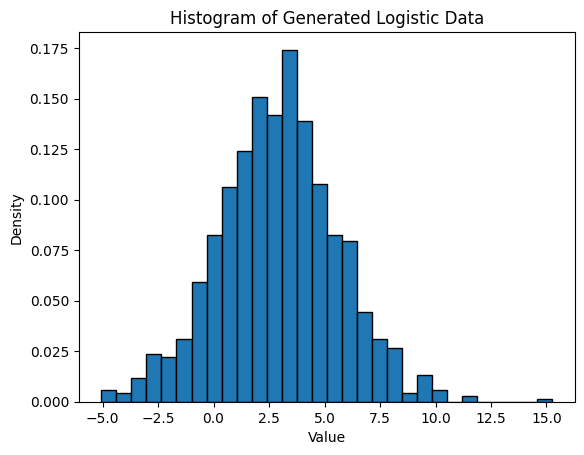

Initial guess: [np.float64(2.9808439840275005), np.float64(2.6784379381096493)]
Initial negative log-likelihood: 2595.255413551779
Estimated mu: 2.9113
Estimated s: 1.5074


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Setting a seed
np.random.seed(42)

# True parameters for logistic distribution
mu_true = 3.0    # Location parameter
s_true = 1.5     # Scale parameter
n = 1000         # Sample size

# Generate random data
data = np.random.logistic(loc=mu_true, scale=s_true, size=n)

# Plot histogram of the data
plt.hist(data, bins=30, edgecolor='k', density=True)
plt.title("Histogram of Generated Logistic Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Corrected negative log-likelihood function for logistic distribution
def neg_log_likelihood(params, data):
    mu, s = params
    if s <= 0:
        return np.inf  # Invalid scale
    z = (data - mu) / s
    log_pdf = -z - 2 * np.log1p(np.exp(-z)) - np.log(s)
    return -np.sum(log_pdf)  # Negative log-likelihood

# Use sample median and std as initial guesses
initial_guess = [np.median(data), np.std(data)]

# Debug: print initial values
print("Initial guess:", initial_guess)
print("Initial negative log-likelihood:", neg_log_likelihood(initial_guess, data))

# Run optimization with bounds
result = minimize(
    neg_log_likelihood,
    initial_guess,
    args=(data,),
    method='L-BFGS-B',
    bounds=[(None, None), (1e-3, None)]  # s > 0.001
)

# Extract and display estimated parameters
mu_mle, s_mle = result.x
print(f"Estimated mu: {mu_mle:.4f}")
print(f"Estimated s: {s_mle:.4f}")
